In [ ]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.random.set_seed(42)

In [ ]:
def plot_image(image):
  plt.imshow(image, cmap="Greys", interpolation="nearest")
  plt.axis("off")

In [ ]:
def show_reconstructions(model, n_test_images = 4):
  reconstructions = model.predict(X_test[:n_test_images])
  fig = plt.figure(figsize=(8, 2 * n_test_images))
  for image_index in range(n_test_images):
    plt.subplot(n_test_images, 2, image_index * 2 + 1)
    plot_image(X_test[image_index])
    plt.subplot(n_test_images, 2, image_index * 2 + 2)
    plot_image(reconstructions[image_index])
  

In [ ]:
def rounded_accuracy(y_true, y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
stacked_encoder = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(30, activation="relu")
])

In [ ]:
stacked_decoder = keras.models.Sequential([
  keras.layers.Dense(100, activation="relu", input_shape=[30]),
  keras.layers.Dense(28*28, activation="sigmoid"),
  keras.layers.Reshape([28,28])
])

In [ ]:
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

In [ ]:
stacked_ae

In [ ]:
stacked_ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [ ]:
stacked_ae.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
history_sae = stacked_ae.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1430 - accuracy: 0.2162
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1016 - accuracy: 0.2663
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0954 - accuracy: 0.2762
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0927 - accuracy: 0.2815
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0911 - accuracy: 0.2848


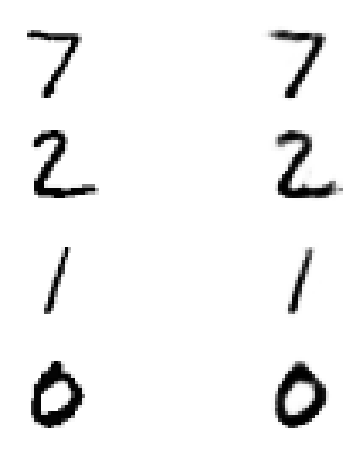

In [ ]:
show_reconstructions(stacked_ae)
plt.show()